PHYS 381: Computational Physics

Assignment 3: Projectile motion under air resistance

Jared Crebo 30085839

Kernel: Python 3.10.11 | IDE: Visual Studio Code

3 Projectile motion under air resistance - Part A

When refreshing the code blocks, be sure to "Run All" instead of running the individual code blocks since some of the iterative variables need to be reset after running once. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere Parameters
B_sphere = 1.6e-4 # Ns/m^2
C_sphere = 0.25 # Ns^2 / m^4
D_sphere = 1e-4 # m
g = 9.81 # m/s^2
density = 2e3 # kg/m^3

# Mass = rho * volume
mass = density * 4/3*np.pi*(D_sphere/2)**3 # kg
# Define timestep size in seconds
dt = 0.01

position_air_resistance() takes the initial conditions of the projectile and calculates its trajectory over time, taking into account the effects of air resistance. It uses equations 4 and 5 in the assignment prompt to iterate the position at each timestep. 

$\frac{dv_x}{dt}=-\frac{b}{m}v_x$

$\frac{dv_y}{dt}=-g-\frac{b}{m}v_y$

It returns the time and x,y coordinates of the projectile. 

In [ ]:
def position_air_resistance(mass, B, D, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    B - linear air resistance coefficient (Ns/m^2)
    D - diameter of object (m)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses Explicit Euler method to calculate the change in (x,y) position wrt time
    Function assumes linear air resistance
    Function returns three Python lists of time and x,y positions
    '''

    # Initialize time, position, and velocity variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    vy = [vy1]
    vx = [vx1]

    # Calculate linear air resistance coefficient
    b = B*D
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        dvy = - g*dt - b/mass * vy[i-1] * dt # Calculate change in vertical velocity using Explicit Euler method on linear air resistance equation
        vy.append(vy[i-1] + dvy) # Add change in vertical velocity to the vertical velocity list
        dvx = -b/mass * vx[i-1] * dt # Calculate change in horizontal velocity using Explicit Euler method on linear air resistance equation
        vx.append(vx[i-1] + dvx) # Add change in horizontal velocity to the horizontal velocity list

        y.append(y[i-1] + vy[i-1] * t[i-1]) # Update new y position based on new velocity
        x.append(x[i-1] + vx[i-1] * t[i-1]) # Update new x position based on new velocity
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y

position_vacuum() takes the same initial conditions of the projectile and calculates its trajectory over time, without taking into account the effects of air resistance. It uses the basic kinematic equations it iterate the position at each timestep. 

$y = y_o + v_{yo} t - 0.5 g t^2$

$x = x_o + v_{xo} t$

It also returns the time and x,y coordinates of the projectile. 

In [31]:
def position_vacuum(mass, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses kinematic equations to calculate the change in (x,y) position wrt time
    Function assumes no air resistance
    Function returns three Python lists of time and x,y positions
    '''

    # Initialize time and position variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        y.append(y[i-1] + vy1*t[i-1] - 0.5*g*t[i-1]**2) # Calculate change in vertical position using kinematic equations
        x.append(x[i-1] + vx1*t[i-1]) # Calculate change in horizontal position using kinematic equations
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y

(-0.1625, 3.4125, -0.18275035721652977, 1.1465816836769773)

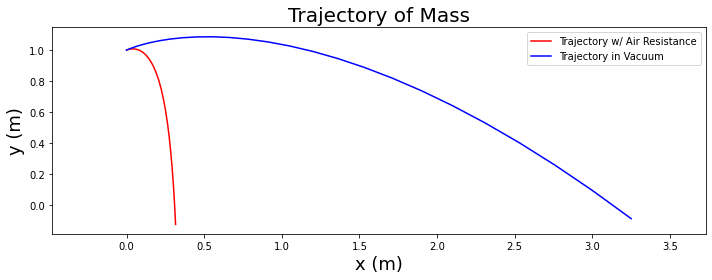

In [32]:
# Initial Conditions (x, y, vx, vy)
init_conds = [0, 1, 1, 0.5] # SI units
# Set an array of init_conds to easily test for different initial conditions and plot them

# Plot the trajectories of projectile motion with and without linear air resistance with the same initial conditions
fig, ax = plt.subplots(figsize=[10,4])
t1, x1, y1 = position_air_resistance(mass, B_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3]) # plot trajectory with air resistance
t2, x2, y2 = position_vacuum(mass, init_conds[0], init_conds[1], init_conds[2], init_conds[3]) # plot trajectory in vacuum
ax.plot(x1, y1, color = "red", label = "Trajectory w/ Air Resistance")
ax.plot(x2, y2, color = "blue", label = "Trajectory in Vacuum")
ax.set_xlabel("x (m)", fontsize=18)
ax.set_ylabel("y (m)", fontsize=18)
ax.set_title("Trajectory of Mass", fontsize=20)
fig.tight_layout()
ax.legend()
ax.axis('equal')

This section of code tests a range of angles $\theta = [0, 90]$ to find the optimum launching angle for a projectile of mass 1.047e-9 kg. 

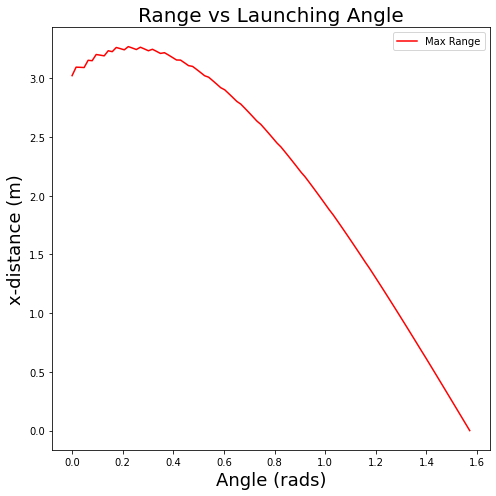

In [33]:
# Initialize range and launch angle Python lists
range = []
angle = []
for i in np.linspace(0,np.pi/2,100): # For a variety of angles between 0 and 90 deg
    # Initial Conditions (x, y, vx, vy)
    init_conds = [0, 1, 10*np.cos(i), 10*np.sin(i)] # Set initial conditions to v = 10m/s with a variety of launch angles i

    # Calculate the projectile motion with varying launch angles
    t, x, y = position_air_resistance(mass, B_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3])
    range.append(max(x)) # Store distance travelled in range list
    angle.append(i) # Store launch angle in angle list

fig, ax = plt.subplots(figsize=[7,7])
ax.plot(angle, range, color = 'red', label = 'Max Range') # Plot the distance travelled vs launch angle
ax.set_xlabel("Angle (rads)", fontsize=18)
ax.set_ylabel("x-distance (m)", fontsize=18)
ax.set_title("Range vs Launching Angle", fontsize=20)
fig.tight_layout()
ax.legend()

In [34]:
# Print the angle of the max range reached, converted to degrees. 
print("The optimum launching angle of a " + str('{:0.3e}'.format(mass)) + " kg projectile is at " + str('{:0.4}'.format(np.rad2deg( angle[range.index(max(range))]) )) + " degrees.")

The optimum launching angle of a 1.047e-09 kg projectile is at 12.73 degrees.


This section of code tests a range of angles $\theta = [0, 90]$ for a range of projectile masses $m = [10^{-9}, 10^{-5}] kg$ to find a relationship between the optimum launching angle and the mass of the projectile. 

The velocity is kept constant at 10 m/s.

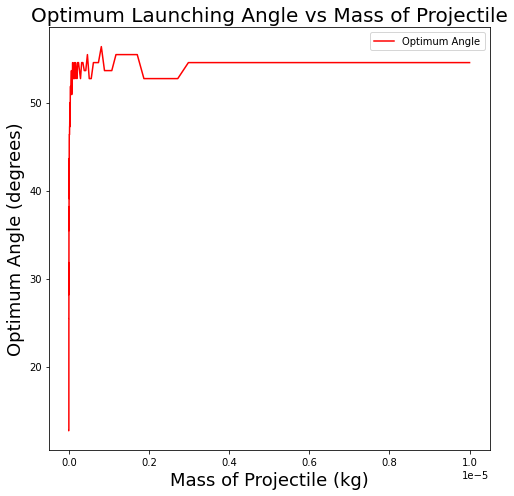

In [ ]:
# Initialize lists to store the optimum launching angle and the masses that will be tested
optimum_angle = []
mass = np.logspace(-9, -5, 100)

for m in mass: # For each mass
    # Initialize range and launch angle Python lists
    range = []
    angle = []
    for i in np.linspace(0,np.pi/2,100): # For a variety of angles between 0 and 90 deg
        # Initial Conditions (x, y, vx, vy)
        init_conds = [0, 1, 10*np.cos(i), 10*np.sin(i)] # Set initial conditions to v = 10m/s with a variety of launch angles i

        # Calculate the projectile motion with varying launch angles
        t, x, y = position_air_resistance(m, B_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3])
        range.append(max(x)) # Store distance travelled in range list
        angle.append(i) # Store launch angle in angle list
    optimum_angle.append(np.rad2deg(angle[range.index(max(range))])) # Store the angle where the max range is reached for that particular mass

fig, ax = plt.subplots(figsize=[7,7])
ax.plot(mass, optimum_angle, color = 'red', label = 'Optimum Angle') # Plot the optimum launch angle for each mass
ax.set_ylabel("Optimum Angle (degrees)", fontsize=18)
ax.set_xlabel("Mass of Projectile (kg)", fontsize=18)
ax.set_title("Optimum Launching Angle vs Mass of Projectile", fontsize=20)
fig.tight_layout()
ax.legend()

The optimum angle is dependent on mass for masses < 4e-6 kg. Otherwise, the optimum angle is a constant 55 degrees after 4e-6 kg. 